# Tutorial 9

**CS3481 Fundamentals of Data Science**

*Semester B 2019/20*
___
**Instructions:**
- same as [Tutorial 1](http://bit.ly/CS3481T1).
___

## Exercise 1 (submit via [uReply](https://cityu.ed2.mobi/student/mobile_index.php) section number **LM1100**)

For this question, you will use WEKA to analyze a skewed dataset. 
1. Download the mamography dataset from [OpenML](https://www.openml.org/d/310).<br>
Woods, Kevin S., et al. "Comparative evaluation of pattern recognition techniques for detection of microcalcifications." Biomedical Image Processing and Biomedical Visualization. Vol. 1905. International Society for Optics and Photonics, 1993. [(Available via CityU VPN.)](https://www.worldscientific.com/doi/abs/10.1142/9789812797834_0011) The following is the description of the dataset excerpted from the paper:

  > To obtain the training and test data, a segmentation routine is run on a set of digitized mammograms. The result of the segmentation routine is a template for each image which indicates the locations of possible microcalcifications called candidates. The segmentation routine is designed to locate small, bright spots (a characteristic of microcalcifications) in the raw image. It is important that most individual calcifications and all clusters of calcifications be segmented since the overall cluster detection accuracy can be limited by the results of the segmentation. Since the segmentation routine will detect objects other than microcalcifications, it is the job of the classifiers to label the candidates as either yes (a microcalcification) or no. A set of 7 features is systematically chosen and values are computed for each candidate. The feature values are organized into a feature vector, normalized, and written to a data file. Therefore, the training and test data is 7-dimensional feature vectors which are normalized between 0 and 1 using the (value-min)/(max-min) formula, where value is the feature vector element being normalized, and max and min are the maximum and minimum training set values for that feature.

2. Use the package manager to download a meta classifier called `ThresholdSelector`, and a filter `SMOTE` [Synthetic Minority Over-sampling Technique](https://doi.org/10.1613/jair.953). 

Your goal is to detect microcalcifications in the mammographic images. Use $10$-fold stratified cross validation and a random seed of $1$ unless otherwise stated.

(a) Using ZeroR as the classifier, obtain the values of accuracy, precision, recall, and specificity. Verify the values by hand calculations. Is ZeroR a good baseline classifier?

[*Hint: Is the accuracy misleading? Can a random decision maker do better than zeroR?*]

___
**Answer:**
___

(b) Using J48 as the classifier instead, obtain the values of accuracy, precision, recall, and the F-score. Verify the value by hand calculations.

___
**Answer:**
___

## Exercise 2 (submit via Canvas discussion page)

For this question, your goal is to obtain the best performance and post your model and results on the [discussion page](https://canvas.cityu.edu.hk/courses/32828/discussion_topics/254800).

(a) In the result list, right click on your result using J48 as the classifier and choose Cost/Benefit analysis and $1$ as the positive class value. Your goal is to find the maximum value of the precision. Give a cost matrix that achieves the maximum precision.
    
[*Hint: Pay attention to the row and column labels of the confusion matrix. It changes after you specify $1$ as the positive class value.*] 

___
**Answer:**
___

(b) The meta classifier ThresholdSelector uses the threshold-moving technique to optimize a performance measure you specify, which can be the precision, recall, $F$ score, etc. Use J48 as the base classifier, obtain the highest precision, recall and $F$ score reported. Is any of these scores equal to $100\%$?

[*Hint: See an explanation of threshold moving technique [here](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/).*]

___
**Answer:**
___

(c) Using the FilteredClassifier with J48 as the classifer and SMOTE as the filter, try to tweek the setting of SMOTE to give the highest possilbe value of $F$ score you can get.

[*See an explanation of SMOTE [here](http://rikunert.com/SMOTE_explained).*]

___
**Answer:**
___

## Exercise 3 (Optional)

Load the dataset from OpenML.

In [0]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
mammo = fetch_openml(data_id=310)
mammo_pd = pd.DataFrame(data=np.c_[mammo.data,mammo.target],columns=mammo.feature_names+['target'])
mammo_pd

,attr1,attr2,attr3,attr4,attr5,attr6,target
0,0.23002,5.07258,-0.276061,0.832444,-0.377866,0.480322,-1
1,0.155491,-0.16939,0.670652,-0.859553,-0.377866,-0.945723,-1
2,-0.784415,-0.443654,5.67471,-0.859553,-0.377866,-0.945723,-1
3,0.546088,0.131415,-0.456387,-0.859553,-0.377866,-0.945723,-1
4,-0.102987,-0.394994,-0.140816,0.979703,-0.377866,1.01357,-1
...,...,...,...,...,...,...,...
11178,-0.250012,-0.3773,-0.321142,1.26916,3.65298,1.09279,1
11179,0.281343,-0.417112,-0.366224,0.85101,2.78965,1.3457,1
11180,1.20499,1.76372,-0.501468,1.56241,6.48907,0.931294,1
11181,0.736644,-0.222474,-0.0506528,1.50966,0.539269,1.31523,1


Import the libraries for decision tree, ROC analysis, and cross validation.

In [0]:
from sklearn import tree
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

Split the data into training and test data.

In [0]:
X = mammo_pd.iloc[:,:-1]
Y = mammo_pd.iloc[:,-1]
trainX, testX, trainY, testY = train_test_split(X,Y,test_size=0.5)

Train the classifier.

In [0]:
clf_gini = tree.DecisionTreeClassifier() 
clf_gini.fit(trainX,trainY)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

To compute the ROC curve (TPR and FPR), the classifer should return soft decisions on the test data in the form of probabilities for each class.

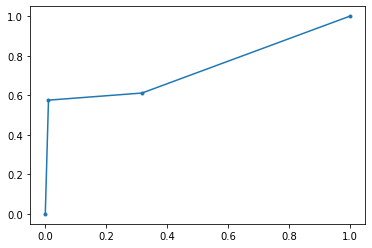

In [0]:
prob = clf_gini.predict_proba(testX)
prob_pos = prob[:,clf_gini.classes_=='1']
fpr, tpr, _ = roc_curve(testY,prob_pos,'1')
pyplot.plot(fpr, tpr, marker='.', label='Decision tree')

Compute the AUC.

In [0]:
roc_auc = roc_auc_score(testY,prob_pos)
print("ROC AUC: {:.2f}".format(roc_auc))

ROC AUC: 0.74


**Exercise:** Why does the ROC curve contain only a few points? 

[*Hint: Check the number of distinct probabilities in `prob_pos`.*]

**Exercise:** Repeat the analysis for PR curve instead using [`pr_curve` and `pr_auc_score`](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/).

**Exercise:** Repeat the analysis with Cross-validation using [`plot_roc_curve`](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html) instead.